In [68]:
import geopandas as gpd 
import osmnx 
import contextily as cx 
import matplotlib.pyplot as plt 
import pandas as pd 
import sys


In [69]:
#For printing all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [70]:
#Read in Copenhagen data
#df_cph = pd.read_csv("data/data_Cph.csv", index_col=0)
gdf_cph= gpd.read_file("data/data_cph.json")
gdf_cph=gdf_cph.set_index("id")
gdf_cph.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
0,None,None,None,None,None,None,None,node,None,None,swimming_pool,None,None,None,13873814,None,None,None,node/13873814,None,POINT (12.63967 55.65514)
1,waste_basket,None,None,None,None,None,None,node,None,None,None,None,None,None,20944608,None,None,None,node/20944608,None,POINT (12.63625 55.65714)
2,post_box,None,None,None,None,None,None,node,None,None,None,None,None,None,24952644,None,None,None,node/24952644,None,POINT (12.55088 55.70141)
3,pub,None,None,None,None,None,None,node,None,None,None,Ølbaren,None,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",24958713,None,None,None,node/24958713,http://oelbaren.dk/,POINT (12.55783 55.68929)
4,post_office,None,None,None,None,None,None,node,None,None,None,Nordvest Postkontor,None,None,24959262,None,None,None,node/24959262,None,POINT (12.52959 55.70355)


In [71]:
#Check for columns only containing nan and drop these
for i in gdf_cph.columns:
    if gdf_cph[i].isnull().values.all() == True:
        gdf_cph = gdf_cph.drop(i, axis=1)

In [72]:
#Read in aarhus data
gdf_aarhus = gpd.read_file("data/data_aarhus.json")
gdf_aarhus=gdf_aarhus.set_index("id")
gdf_aarhus.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
0,fuel,None,None,None,None,None,None,node,None,None,None,Uno-X,None,None,33694221,None,None,None,node/33694221,None,POINT (10.23554 56.20715)
1,post_box,None,None,None,None,None,None,node,None,None,None,None,None,None,61783581,None,None,None,node/61783581,None,POINT (10.23149 56.22741)
2,fuel,None,None,None,None,None,None,node,None,None,None,Q8,None,None,119286594,None,None,None,node/119286594,None,POINT (10.28086 56.21179)
3,fuel,None,None,None,None,None,None,node,None,None,None,Uno X,None,None,245550748,None,None,None,node/245550748,None,POINT (10.18027 56.15369)
4,fuel,None,None,None,None,None,None,node,None,None,None,Ingo,None,None,247135581,None,ingo.se,None,node/247135581,None,POINT (10.16796 56.13248)


In [73]:
#Check for columns only containing nan and drop these
for i in gdf_aarhus.columns:
    if gdf_aarhus[i].isnull().values.all() == True:
        gdf_aarhus = gdf_aarhus.drop(i, axis=1)

<AxesSubplot:>

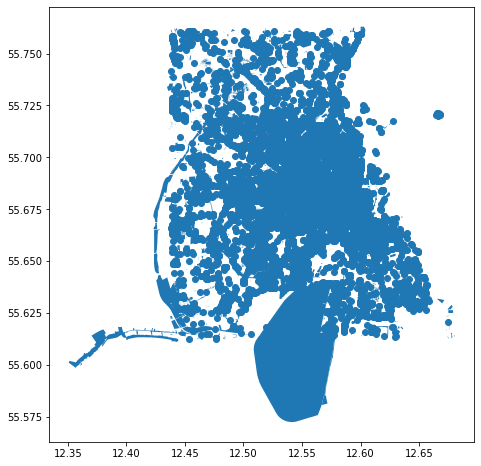

In [74]:
gdf_cph.plot()

<AxesSubplot:>

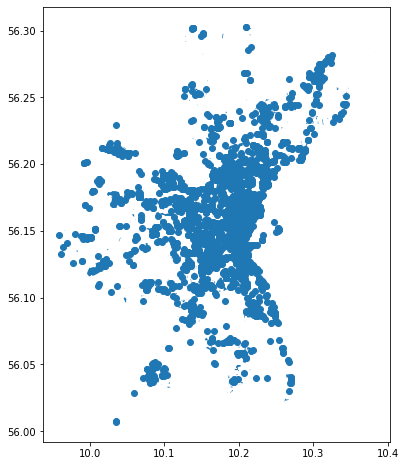

In [75]:
gdf_aarhus.plot()

In [76]:
#Find all types of amenities, tourism and leisure in Copenhagen
print("Unique values in amenity tag Copenhagen", gdf_cph["amenity"].unique())
print("Unique values in tourism tag Copenhagen", gdf_cph["tourism"].unique())
print("Unique values in leisure tag Copenhagen", gdf_cph["leisure"].unique())

#Also find these points for Aarhus
print("Unique values in amenity tag Aarhus", gdf_aarhus["amenity"].unique())
print("Unique values in tourism tag Aarhus", gdf_aarhus["tourism"].unique())
print("Unique values in leisure tag Aarhus", gdf_aarhus["leisure"].unique())

Unique values in amenity tag Copenhagen [None 'waste_basket' 'post_box' 'pub' 'post_office' 'restaurant' 'cinema'
 'bar' 'fire_station' 'fuel' 'parking' 'atm' 'toilets' 'bench'
 'swingerclub' 'nightclub' 'parking_entrance' 'police' 'library'
 'townhall' 'fast_food' 'college' 'cafe' 'theatre' 'bank' 'school'
 'clinic' 'recycling' 'preschool' 'veterinary' 'compressed_air'
 'bicycle_parking' 'drinking_water' 'pharmacy' 'place_of_worship'
 'bureau_de_change' 'money_transfer' 'car_rental' 'courthouse' 'taxi'
 'bus_station' 'traffic_school' 'kindergarten' 'university' 'doctors'
 'ice_cream' 'dentist' 'bicycle_rental' 'flowers' 'ferry_terminal'
 'events_venue' 'stripclub' 'gambling' 'fountain' 'internet_cafe'
 'waste_disposal' 'photo' 'bbq' 'arts_centre' 'publisher'
 'vending_machine' 'boat_rental' 'climbing_wall' 'bicycle_repair_station'
 'clock' 'hospital' 'car_wash' 'elevator' 'bath' 'driving_school'
 'marketplace' 'shelter' 'music_venue' 'grave_yard'
 'sanitary_dump_station' 'studio' 'sho

In [77]:
#Keep only the specific values we want based on the previous list of unique elements

keep_list_a = ['pub', 'restaurant', 'cinema', 'bar', 'nightclub', 'cafe', 'theatre', 'place_of_worship',
                              'ice_cream', 'bicycle_rental', 'flowers', 'fountain', 'arts_centre', 'boat_rental', 'music_venue',
                              'monastery', 'club', 'deli', 'gallery', 'marketplace', 'biergarten', 'food_court', 'planetarium']

keep_list_t = ['picnic_site', 'viewpoint', 'artwork', 'museum', 'gallery', 'theme_park', 'attraction']

keep_list_l = ['bowling_alley', 'trampoline_park', 'adult_gaming_centre',
                              'escape_game', 'garden', 'marina', 'miniature_golf','ceramic_painting',
                              'park', 'dog_park', 'recreation_ground', 'stadium', 'water_park', 
                              'paintball']

#Category lists for later use
service = ['pub', 'restaurant', 'bar', 'nightclub', 'cafe', 'ice_cream', 'club', 'deli','biergarten', 'food_court']
activity = ['cinema', 'theatre', 'place_of_worship', 'arts_centre', 'music_venue', 'monastery', 'gallery', 'planetarium', 
            'artwork', 'museum', 'theme_park', 'attraction', 'bowling_alley', 'trampoline_park', 'adult_gaming_centre', 
            'escape_game', 'miniature_golf','ceramic_painting', 'stadium', 'water_park', 'paintball']
outdoor = ['bicycle_rental', 'flowers', 'fountain', 'boat_rental', 'marketplace', 'picnic_site', 'viewpoint', 'garden', 
           'marina', 'park', 'dog_park', 'recreation_ground']

#Copenhagen
gdf_cph_a=gdf_cph[gdf_cph.amenity.isin(keep_list_a)]

gdf_cph_t=gdf_cph[gdf_cph.tourism.isin(keep_list_t)]
        

gdf_cph_l=gdf_cph[gdf_cph.leisure.isin(keep_list_l)]

gdf_cph_all = pd.concat([gdf_cph_a, gdf_cph_t, gdf_cph_l])

#Aarhus
gdf_aarhus_a=gdf_aarhus[gdf_aarhus.amenity.isin(keep_list_a)]

gdf_aarhus_t=gdf_aarhus[gdf_aarhus.tourism.isin(keep_list_t)]
        

gdf_aarhus_l=gdf_aarhus[gdf_aarhus.leisure.isin(keep_list_l)]

gdf_aarhus_all = pd.concat([gdf_aarhus_a, gdf_aarhus_t, gdf_aarhus_l])

gdf_cph_all.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry
id,,,,,,,,,,,,,,,,,,,,,
3,pub,None,None,None,None,None,None,node,None,None,None,Ølbaren,None,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",24958713,None,None,None,node/24958713,http://oelbaren.dk/,POINT (12.55783 55.68929)
5,restaurant,None,None,None,regional,None,None,node,None,None,None,Nørrebro Bryghus Restaurant,None,"Mo-Th 12:00-15:00,17:30-22:00; Fr-Sa 12:00-15:...",24971137,None,None,None,node/24971137,https://noerrebrobryghus.dk/,POINT (12.56391 55.69022)
7,cinema,None,None,None,None,None,None,node,None,None,None,Empire Bio,None,12:00-22:30,25440190,None,None,None,node/25440190,https://www.empirebio.dk/,POINT (12.55582 55.69195)
8,pub,None,None,None,None,None,None,node,None,None,None,Bankeråt,None,Mo-Fr 09:30-24:00;Sa-Su 10:30-24:00,25440922,None,None,None,node/25440922,http://www.bankeraat.dk,POINT (12.56518 55.68341)
10,bar,None,None,None,None,None,None,node,None,None,None,Black Swan,None,"Mo-We 15:00-01:00, Th-Sa 15:00-02:00, Su 15:00...",25869217,None,None,None,node/25869217,http://www.blackswanbar.dk/,POINT (12.58743 55.68649)


Now we find out what types of destinations do not have a name and whether we should drop rows without a name or not.

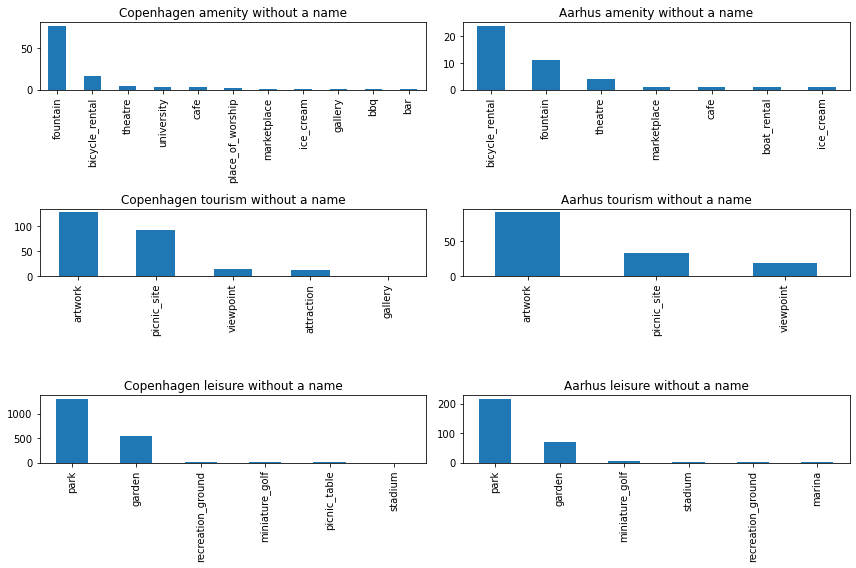

In [78]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12,8]


fig, axs = plt.subplots(3, 2)

gdf_cph_all["amenity"].loc[gdf_cph_all['name'].isnull()].value_counts().plot(ax=axs[0,0], kind='bar')
axs[0,0].set_title("Copenhagen amenity without a name")
gdf_cph_all["tourism"].loc[gdf_cph_all['name'].isnull()].value_counts().plot(ax=axs[1,0], kind='bar')
axs[1,0].set_title("Copenhagen tourism without a name")
gdf_cph_all["leisure"].loc[gdf_cph_all['name'].isnull()].value_counts().plot(ax=axs[2,0], kind='bar')
axs[2,0].set_title("Copenhagen leisure without a name")
gdf_aarhus_all["amenity"].loc[gdf_aarhus_all['name'].isnull()].value_counts().plot(ax=axs[0,1], kind='bar')
axs[0,1].set_title("Aarhus amenity without a name")
gdf_aarhus_all["tourism"].loc[gdf_aarhus_all['name'].isnull()].value_counts().plot(ax=axs[1,1], kind='bar')
axs[1,1].set_title("Aarhus tourism without a name")
gdf_aarhus_all["leisure"].loc[gdf_aarhus_all['name'].isnull()].value_counts().plot(ax=axs[2,1], kind='bar')
axs[2,1].set_title("Aarhus leisure without a name")

fig.tight_layout()
fig.show()

#df[["c", "d"]].plot(ax=axes[1], kind='bar')



We find that a lot of the places that do not have a name are sights such as fountains or park, which we want to keep as destination points. On the other hand, we do not wish to keep destinations such as bars and museums which do not have a name. All rows with the column value "service" or "activity" should have a name but "outdoor" does not need to. 

## Data categorization
We want to find certain groups in the data, based on what type of experience, a user could get from the certain destination as we want to propose different types of categories on a route. 
We will divide the categories into:
- The service industry (including destinations such as bars and restaurants)
- Cultural destinations (such as museums and galleries)
- Outdoor destinations (such as parks and fountains)

We also split the data time category based on their opening hours.

First we look into the unique values of each tag and qualitatively assign these to one of the three categories 

In [87]:
print(gdf_cph_all["amenity"].unique())
print(gdf_cph_all["tourism"].unique())
print(gdf_cph_all["leisure"].unique())

print(gdf_aarhus_all["amenity"].unique())
print(gdf_aarhus_all["tourism"].unique())
print(gdf_aarhus_all["leisure"].unique())

['pub' 'restaurant' 'bar' 'nightclub' 'cafe' 'ice_cream' 'club' 'deli'
 'biergarten' 'food_court' 'cinema' 'theatre' 'place_of_worship'
 'arts_centre' 'music_venue' 'monastery' 'gallery' 'planetarium'
 'fountain' None 'public_bookcase' 'fast_food' 'university' 'townhall'
 'bicycle_rental' 'flowers' 'boat_rental' 'marketplace' 'bbq']
[None 'museum' 'hotel' 'attraction' 'artwork' 'gallery' 'theme_park'
 'picnic_site' 'viewpoint' 'yes']
[None 'fussball' 'handicraft' 'ceramic_painting' 'park' 'garden' 'marina'
 'bowling_alley' 'stadium' 'miniature_golf' 'trampoline_park'
 'adult_gaming_centre' 'water_park' 'picnic_table' 'dog_park'
 'recreation_ground']
['pub' 'cinema' 'fountain' 'bar' 'restaurant' 'cafe' 'nightclub'
 'bicycle_rental' 'ice_cream' 'theatre' 'marketplace' 'music_venue'
 'place_of_worship' 'boat_rental' 'arts_centre' 'club' 'food_court' None]
[None 'gallery' 'museum' 'picnic_site' 'viewpoint' 'artwork' 'theme_park'
 'attraction']
[None 'dance' 'sports_centre' 'park' 'marina' 

In [80]:
#Created list with each of the three categories

In [88]:
print(service, activity, outdoor)

['pub', 'restaurant', 'bar', 'nightclub', 'cafe', 'ice_cream', 'club', 'deli', 'biergarten', 'food_court'] ['cinema', 'theatre', 'place_of_worship', 'arts_centre', 'music_venue', 'monastery', 'gallery', 'planetarium', 'artwork', 'museum', 'theme_park', 'attraction', 'bowling_alley', 'trampoline_park', 'adult_gaming_centre', 'escape_game', 'miniature_golf', 'ceramic_painting', 'stadium', 'water_park', 'paintball'] ['bicycle_rental', 'flowers', 'fountain', 'boat_rental', 'marketplace', 'picnic_site', 'viewpoint', 'garden', 'marina', 'park', 'dog_park', 'recreation_ground']


In [89]:
#Dropping Na for service and activity
#Service
gdf_cph_new_service_amenity=gdf_cph_all[gdf_cph_all['amenity'].isin(service)]
gdf_cph_new_service_amenity['category'] = "service"
gdf_cph_new_service_amenity=gdf_cph_new_service_amenity.dropna(subset=['name'])

gdf_cph_new_service_tourism=gdf_cph_all[gdf_cph_all['tourism'].isin(service)]
gdf_cph_new_service_tourism['category'] = "service"
gdf_cph_new_service_tourism=gdf_cph_new_service_tourism.dropna(subset=['name'])

gdf_cph_new_service_leisure=gdf_cph_all[gdf_cph_all['leisure'].isin(service)]
gdf_cph_new_service_leisure['category'] = "service"
gdf_cph_new_service_leisure=gdf_cph_new_service_leisure.dropna(subset=['name'])

#activity
gdf_cph_new_activity_amenity=gdf_cph_all[gdf_cph_all['amenity'].isin(activity)]
gdf_cph_new_activity_amenity['category'] = "activity"
gdf_cph_new_activity_amenity=gdf_cph_new_activity_amenity.dropna(subset=['name'])

gdf_cph_new_activity_tourism=gdf_cph_all[gdf_cph_all['tourism'].isin(activity)]
gdf_cph_new_activity_tourism['category'] = "activity"
gdf_cph_new_activity_tourism=gdf_cph_new_activity_tourism.dropna(subset=['name'])

gdf_cph_new_activity_leisure=gdf_cph_all[gdf_cph_all['leisure'].isin(activity)]
gdf_cph_new_activity_leisure['category'] = "activity"
gdf_cph_new_activity_leisure=gdf_cph_new_activity_leisure.dropna(subset=['name'])

#outdoor
gdf_cph_new_outdoor_amenity=gdf_cph_all[gdf_cph_all['amenity'].isin(outdoor)]
gdf_cph_new_outdoor_amenity['category'] = "outdoor"

gdf_cph_new_outdoor_tourism=gdf_cph_all[gdf_cph_all['tourism'].isin(outdoor)]
gdf_cph_new_outdoor_tourism['category'] = "outdoor"

gdf_cph_new_outdoor_leisure=gdf_cph_all[gdf_cph_all['leisure'].isin(outdoor)]
gdf_cph_new_outdoor_leisure['category'] = "outdoor"

#Put them all together
dataframes =[gdf_cph_new_service_amenity, gdf_cph_new_service_tourism, gdf_cph_new_service_leisure, 
             gdf_cph_new_activity_amenity,gdf_cph_new_activity_tourism, gdf_cph_new_activity_leisure,
             gdf_cph_new_outdoor_amenity, gdf_cph_new_outdoor_tourism, gdf_cph_new_outdoor_leisure]
gdf_cph_all = pd.concat(dataframes)

#Aarhus
#Dropping Na for service and activity
#Service
gdf_aarhus_new_service_amenity=gdf_aarhus_all[gdf_aarhus_all['amenity'].isin(service)]
gdf_aarhus_new_service_amenity['category'] = "service"
gdf_aarhus_new_service_amenity=gdf_aarhus_new_service_amenity.dropna(subset=['name'])

gdf_aarhus_new_service_tourism=gdf_aarhus_all[gdf_aarhus_all['tourism'].isin(service)]
gdf_aarhus_new_service_tourism['category'] = "service"
gdf_aarhus_new_service_tourism=gdf_aarhus_new_service_tourism.dropna(subset=['name'])

gdf_aarhus_new_service_leisure=gdf_aarhus_all[gdf_aarhus_all['leisure'].isin(service)]
gdf_aarhus_new_service_leisure['category'] = "service"
gdf_aarhus_new_service_leisure=gdf_aarhus_new_service_leisure.dropna(subset=['name'])

#activity
gdf_aarhus_new_activity_amenity=gdf_aarhus_all[gdf_aarhus_all['amenity'].isin(activity)]
gdf_aarhus_new_activity_amenity['category'] = "activity"
gdf_aarhus_new_activity_amenity=gdf_aarhus_new_activity_amenity.dropna(subset=['name'])

gdf_aarhus_new_activity_tourism=gdf_aarhus_all[gdf_aarhus_all['tourism'].isin(activity)]
gdf_aarhus_new_activity_tourism['category'] = "activity"
gdf_aarhus_new_activity_tourism=gdf_aarhus_new_activity_tourism.dropna(subset=['name'])

gdf_aarhus_new_activity_leisure=gdf_aarhus_all[gdf_aarhus_all['leisure'].isin(activity)]
gdf_aarhus_new_activity_leisure['category'] = "activity"
gdf_aarhus_new_activity_leisure=gdf_aarhus_new_activity_leisure.dropna(subset=['name'])

#outdoor
gdf_aarhus_new_outdoor_amenity=gdf_aarhus_all[gdf_aarhus_all['amenity'].isin(outdoor)]
gdf_aarhus_new_outdoor_amenity['category'] = "outdoor"

gdf_aarhus_new_outdoor_tourism=gdf_aarhus_all[gdf_aarhus_all['tourism'].isin(outdoor)]
gdf_aarhus_new_outdoor_tourism['category'] = "outdoor"

gdf_aarhus_new_outdoor_leisure=gdf_aarhus_all[gdf_aarhus_all['leisure'].isin(outdoor)]
gdf_aarhus_new_outdoor_leisure['category'] = "outdoor"

#Put them all together
dataframes_aarhus =[gdf_aarhus_new_service_amenity, gdf_aarhus_new_service_tourism, gdf_aarhus_new_service_leisure, 
             gdf_aarhus_new_activity_amenity,gdf_aarhus_new_activity_tourism, gdf_aarhus_new_activity_leisure,
             gdf_aarhus_new_outdoor_amenity, gdf_aarhus_new_outdoor_tourism, gdf_aarhus_new_outdoor_leisure]
gdf_aarhus_all = pd.concat(dataframes_aarhus)

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [109]:
gdf_cph_all.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
3,pub,None,None,None,None,None,None,node,None,None,None,Ølbaren,None,"Mo 21:00-01:00, Tu-We 16:00-01:00, Th 16:00-02...",24958713,None,None,None,node/24958713,http://oelbaren.dk/,POINT (12.55783 55.68929),service
5,restaurant,None,None,None,regional,None,None,node,None,None,None,Nørrebro Bryghus Restaurant,None,"Mo-Th 12:00-15:00,17:30-22:00; Fr-Sa 12:00-15:...",24971137,None,None,None,node/24971137,https://noerrebrobryghus.dk/,POINT (12.56391 55.69022),service
8,pub,None,None,None,None,None,None,node,None,None,None,Bankeråt,None,Mo-Fr 09:30-24:00;Sa-Su 10:30-24:00,25440922,None,None,None,node/25440922,http://www.bankeraat.dk,POINT (12.56518 55.68341),service
10,bar,None,None,None,None,None,None,node,None,None,None,Black Swan,None,"Mo-We 15:00-01:00, Th-Sa 15:00-02:00, Su 15:00...",25869217,None,None,None,node/25869217,http://www.blackswanbar.dk/,POINT (12.58743 55.68649),service
11,pub,None,None,None,None,None,None,node,None,None,None,Café Viking,None,"Mo-Sa 09:00-02:00, Su 09:00-20:00",25904721,None,None,None,node/25904721,http://www.cafeviking.dk,POINT (12.54671 55.69961),service


In [91]:
gdf_aarhus_all.head()

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
77,pub,None,None,None,None,None,None,node,None,None,None,Harlev Bodega,None,None,439756511,None,None,None,node/439756511,https://harlevbodega.wixsite.com/bodega/forside,POINT (10.00065 56.14525),service
159,pub,None,None,None,None,None,None,node,None,None,None,Det lille apotek,None,None,533618253,None,None,None,node/533618253,None,POINT (10.08112 56.03718),service
162,pub,None,None,None,None,None,None,node,None,None,None,Solbjerg Bodega,None,None,533618728,None,None,None,node/533618728,None,POINT (10.08204 56.04364),service
180,bar,None,None,None,None,None,None,node,None,None,None,Kurts Mor,None,"13:00-01:00,Th 13:00-02:00, Fr 12:00-02:30, Sa...",562698137,None,None,None,node/562698137,https://www.kurtsmor.dk/,POINT (10.20953 56.15393),service
181,pub,None,None,None,None,None,None,node,None,None,None,Sherlock Holmes Pub,None,None,562704473,None,None,None,node/562704473,None,POINT (10.20316 56.15385),service


In [92]:
#Check for columns only containing nan and drop these
#Copenhagen
for i in gdf_cph_all.columns:
    if gdf_cph_all[i].isnull().values.all() == True:
        print("column", i, gdf_cph_all[i].isna().values.all())
        gdf_cph_all = gdf_cph_all.drop(i, axis=1)

#Aarhus
for i in gdf_aarhus_all.columns:
    if gdf_aarhus_all[i].isnull().values.all() == True:
        print("column", i, gdf_aarhus_all[i].isna().values.all())
        gdf_aarhus_all = gdf_aarhus_all.drop(i, axis=1)


<AxesSubplot:>

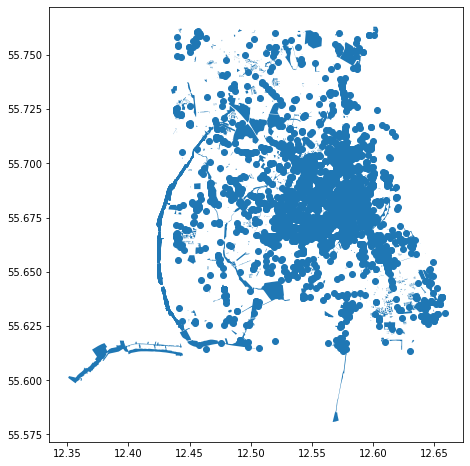

In [93]:
gdf_cph_all.plot()

<AxesSubplot:>

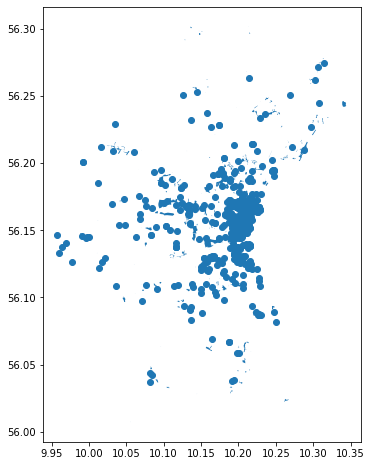

In [94]:
gdf_aarhus_all.plot()

In [95]:
#Copenhagen
for i in gdf_cph_all["amenity"].unique():
    if i not in keep_list_a:
        print("Amenities that reoccured", i)
        
for i in gdf_cph_all["tourism"].unique():
    if i not in keep_list_t:
        print("Tourism that reoccured", i)
        
for i in gdf_cph_all["leisure"].unique():
    if i not in keep_list_l:
        print("Leisure that reoccured", i)

#Aarhus        
for i in gdf_aarhus_all["amenity"].unique():
    if i not in keep_list_a:
        print("Amenities that reoccured Aarhus", i)
        
for i in gdf_aarhus_all["tourism"].unique():
    if i not in keep_list_t:
        print("Tourism that reoccured Aarhus", i)
        
for i in gdf_aarhus_all["leisure"].unique():
    if i not in keep_list_l:
        print("Leisure that reoccured Aarhus", i)

Amenities that reoccured None
Amenities that reoccured public_bookcase
Amenities that reoccured fast_food
Amenities that reoccured university
Amenities that reoccured townhall
Amenities that reoccured bbq
Tourism that reoccured None
Tourism that reoccured hotel
Tourism that reoccured yes
Leisure that reoccured None
Leisure that reoccured fussball
Leisure that reoccured handicraft
Leisure that reoccured picnic_table
Amenities that reoccured Aarhus None
Tourism that reoccured Aarhus None
Leisure that reoccured Aarhus None
Leisure that reoccured Aarhus sports_centre
Leisure that reoccured Aarhus dance


In [96]:
#Checking these specific values to see what rows they occur in and whether these rows are relevant
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'public_bookcase']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
4436,public_bookcase,None,None,None,None,None,None,node,None,None,None,Bogbørsen,None,None,3813183021,None,None,attraction,node/3813183021,http://www.gentofte.dk/Om-kommunen/Nyheder/201...,POINT (12.57197 55.76018),activity


In [97]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'fast_food']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
8315,fast_food,None,None,None,None,None,None,node,None,None,None,Dinos Legeland,None,"Mo-Fr 10:00-19:00; Sa,Su 09:30-19:00",6700902449,None,None,theme_park,node/6700902449,https://dinoslegeland.dk/oerestad/,POINT (12.57448 55.61966),activity
6963,fast_food,None,None,None,burger,None,yes,node,None,None,miniature_golf,"Camping Kødbyen - Minigolf, bar & burgers",None,None,5299629819,None,None,None,node/5299629819,https://www.camping.bar/kodbyen,POINT (12.55894 55.66686),activity


In [98]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'university']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
14925,university,None,None,None,None,None,None,way,None,None,None,Kommunitetsbygningen,"[ 295317809, 1458183231, 1458183205, 145818321...",None,26950614,None,None,attraction,way/26950614,None,"POLYGON ((12.57144 55.68045, 12.57146 55.68040...",activity


In [99]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'bbq']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
15502,bbq,None,None,None,None,None,None,way,None,None,None,None,"[ 1306865997, 939045545, 1306866000, 130686599...",None,115750878,None,None,picnic_site,way/115750878,None,"POLYGON ((12.57765 55.65183, 12.57753 55.65177...",outdoor
15654,bbq,None,None,None,None,None,None,way,None,None,None,Picnicøen,"[ 1368691967, 1368691850, 1368691950, 13686919...",None,122496443,None,None,picnic_site,way/122496443,None,"POLYGON ((12.57776 55.63332, 12.57782 55.63333...",outdoor


In [100]:
gdf_cph_all.loc[gdf_cph_all['amenity'] == 'townhall']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
25006,townhall,None,None,None,None,None,None,relation,rundvisning@okf.kk.dk,None,None,Københavns Rådhus,"[ [ [ 5308323041, 9107374471, 9107374470, 9107...",None,52142,None,None,attraction,relation/52142,None,"POLYGON ((12.57106 55.67534, 12.57147 55.67514...",activity


We see that all these values are ones we want to keep. We do the same for the tourism and leisure tags 

In [101]:
gdf_cph_all.loc[gdf_cph_all['tourism'] == 'hotel']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
477,restaurant,None,None,None,None,None,None,node,None,None,None,Hebron,None,None,298796142,None,None,hotel,node/298796142,https://www.hebron.dk/,POINT (12.56078 55.67262),service


In [102]:
gdf_cph_all.loc[gdf_cph_all['tourism'] == 'yes']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
15770,None,None,None,None,None,None,None,way,None,None,park,Naturcenter Amager,"[ 1470583920, 1470607752, 8547901593, 14706715...",None,133625979,None,None,yes,way/133625979,https://naturstyrelsen.dk/naturoplevelser/unde...,"POLYGON ((12.57492 55.61382, 12.57386 55.61428...",outdoor


In [103]:
gdf_cph_all.loc[gdf_cph_all['leisure'] == 'fussball']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
603,bar,vangandbar,None,None,None,None,None,node,info@flisenbarandburgers.dk,None,fussball,Vang & Bar,None,Tu 16:00-24:00; We 16:00-01:00; Th-Sa 16:00-02:00,442948295,None,None,None,node/442948295,https://www.vangandbar.com/,POINT (12.54216 55.66321),service


In [104]:
gdf_cph_all.loc[gdf_cph_all['leisure'] == 'handicraft']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
14005,bar,None,None,None,None,None,None,node,None,None,handicraft,The Fiddlery,None,10:00-22:00; Fr-Sa 10:00-24:00,9350660863,None,None,None,node/9350660863,https://thefiddlery.dk/,POINT (12.57608 55.69766),service


We also do this for Aarhus.

In [107]:
gdf_aarhus_all.loc[gdf_aarhus_all['leisure'] == 'sports_centre']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
3098,bar,None,None,None,None,None,None,node,None,None,sports_centre,Padel Star,None,None,8197477574,None,None,None,node/8197477574,https://padelstar.dk/,POINT (10.16490 56.10801),service


In [108]:
gdf_aarhus_all.loc[gdf_aarhus_all['leisure'] == 'dance']

,amenity,contact:instagram,contact:phone,contact:website,cuisine,diet:vegan,dinner,element_type,email,facebook,leisure,name,nodes,opening_hours,osmid,reservation,source,tourism,unique_id,website,geometry,category
id,,,,,,,,,,,,,,,,,,,,,,
2174,music_venue,None,None,None,None,None,None,node,None,None,dance,CasaV58,None,None,5682665985,None,None,None,node/5682665985,https://www.casacarola.dk/,POINT (10.20062 56.15796),activity


We now save these cleaned data files to json-format.

In [111]:
#Saving cleaned Copenhagen data
with open('data/data_cleaned_cph.json', 'w') as f:
    f.write(gdf_cph_all.to_json())

#Saving cleaned Aarhus data
with open('data/data_cleaned_aarhus.json', 'w') as f:
    f.write(gdf_aarhus_all.to_json())